In [1]:
import pandas as pd

In [2]:
shop_sales = pd.read_csv('../data/raw/shop_sales.csv')
shop_sales_dates = pd.read_csv('../data/raw/shop_sales_dates.csv')
shop_sales_prices = pd.read_csv('../data/raw/shop_sales_prices.csv')


In [3]:
merged_sales_dates = pd.merge(shop_sales, shop_sales_dates, on='date_id', how='left')
final_merged_data = pd.merge(merged_sales_dates, shop_sales_prices, on=['store_id', 'item_id', 'wm_yr_wk'], how='left')

In [4]:
final_merged_data.head()

item_id store_id  date_id  cnt        date  wm_yr_wk    weekday  wday  \
0  STORE_2_085  STORE_2        1    3  2011-01-29     11101   Saturday     1   
1  STORE_2_085  STORE_2        2    8  2011-01-30     11101     Sunday     2   
2  STORE_2_085  STORE_2        3    0  2011-01-31     11101     Monday     3   
3  STORE_2_085  STORE_2        4    3  2011-02-01     11101    Tuesday     4   
4  STORE_2_085  STORE_2        5    0  2011-02-02     11101  Wednesday     5   

   month  year event_name_1 event_type_1 event_name_2 event_type_2  \
0      1  2011          NaN          NaN          NaN          NaN   
1      1  2011          NaN          NaN          NaN          NaN   
2      1  2011          NaN          NaN          NaN          NaN   
3      2  2011          NaN          NaN          NaN          NaN   
4      2  2011          NaN          NaN          NaN          NaN   

   CASHBACK_STORE_1  CASHBACK_STORE_2  CASHBACK_STORE_3  sell_price  
0                 0                 0                 0         1.0  
1                 0                 0                 0         1.0  
2                 0                 0                 0         1.0  
3                 0                 1                 1         1.0  
4                 1                 1                 0         1.0

In [5]:
data = final_merged_data.copy()

In [6]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data['event_name_1'].fillna('0', inplace=True)
data['event_type_1'].fillna('0', inplace=True)
data['event_name_2'].fillna('0', inplace=True)
data['event_type_2'].fillna('0', inplace=True)

label_encoder_event_name_1 = LabelEncoder()
label_encoder_event_type_1 = LabelEncoder()
label_encoder_event_name_2 = LabelEncoder()
label_encoder_event_type_2 = LabelEncoder()

data['event_name_1_encoded'] = label_encoder_event_name_1.fit_transform(data['event_name_1'])
data['event_type_1_encoded'] = label_encoder_event_type_1.fit_transform(data['event_type_1'])
data['event_name_2_encoded'] = label_encoder_event_name_2.fit_transform(data['event_name_2'])
data['event_type_2_encoded'] = label_encoder_event_type_2.fit_transform(data['event_type_2'])

In [7]:
# data[['event_name_1', 'event_type_1', 'event_name_1_encoded', 'event_type_1_encoded']]
data

item_id store_id  date_id  cnt        date  wm_yr_wk    weekday  \
0      STORE_2_085  STORE_2        1    3  2011-01-29     11101   Saturday   
1      STORE_2_085  STORE_2        2    8  2011-01-30     11101     Sunday   
2      STORE_2_085  STORE_2        3    0  2011-01-31     11101     Monday   
3      STORE_2_085  STORE_2        4    3  2011-02-01     11101    Tuesday   
4      STORE_2_085  STORE_2        5    0  2011-02-02     11101  Wednesday   
...            ...      ...      ...  ...         ...       ...        ...   
81850  STORE_1_727  STORE_1     1815    2  2016-01-17     11551     Sunday   
81851  STORE_1_727  STORE_1     1816    3  2016-01-18     11551     Monday   
81852  STORE_1_727  STORE_1     1817    1  2016-01-19     11551    Tuesday   
81853  STORE_1_727  STORE_1     1818    4  2016-01-20     11551  Wednesday   
81854  STORE_1_727  STORE_1     1819    2  2016-01-21     11551   Thursday   

       wday  month  year         event_name_1 event_type_1 event_name_2  \
0         1      1  2011                  NaN          NaN          NaN   
1         2      1  2011                  NaN          NaN          NaN   
2         3      1  2011                  NaN          NaN          NaN   
3         4      2  2011                  NaN          NaN          NaN   
4         5      2  2011                  NaN          NaN          NaN   
...     ...    ...   ...                  ...          ...          ...   
81850     2      1  2016                  NaN          NaN          NaN   
81851     3      1  2016  MartinLutherKingDay     National          NaN   
81852     4      1  2016                  NaN          NaN          NaN   
81853     5      1  2016                  NaN          NaN          NaN   
81854     6      1  2016                  NaN          NaN          NaN   

      event_type_2  CASHBACK_STORE_1  CASHBACK_STORE_2  CASHBACK_STORE_3  \
0              NaN                 0                 0                 0   
1              NaN                 0                 0                 0   
2              NaN                 0                 0                 0   
3              NaN                 0                 1                 1   
4              NaN                 1                 1                 0   
...            ...               ...               ...               ...   
81850          NaN                 0                 0                 0   
81851          NaN                 0                 0                 0   
81852          NaN                 0                 0                 0   
81853          NaN                 0                 0                 0   
81854          NaN                 0                 0                 0   

       sell_price  
0            1.00  
1            1.00  
2            1.00  
3            1.00  
4            1.00  
...           ...  
81850        4.48  
81851        4.48  
81852        4.48  
81853        4.48  
81854        4.48  

[81855 rows x 18 columns]

In [8]:
from etna.datasets.tsdataset import TSDataset
from etna.transforms import LagTransform
from etna.transforms import LinearTrendTransform

c:\Users\saifu\AppData\Local\pypoetry\Cache\virtualenvs\dfu-automl-33GLpTph-py3.10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
data['timestamp'] = pd.to_datetime(data['date'])
data['segment'] = data['item_id']
data['target'] = data['cnt']

In [17]:
ts = TSDataset(data, freq="D")

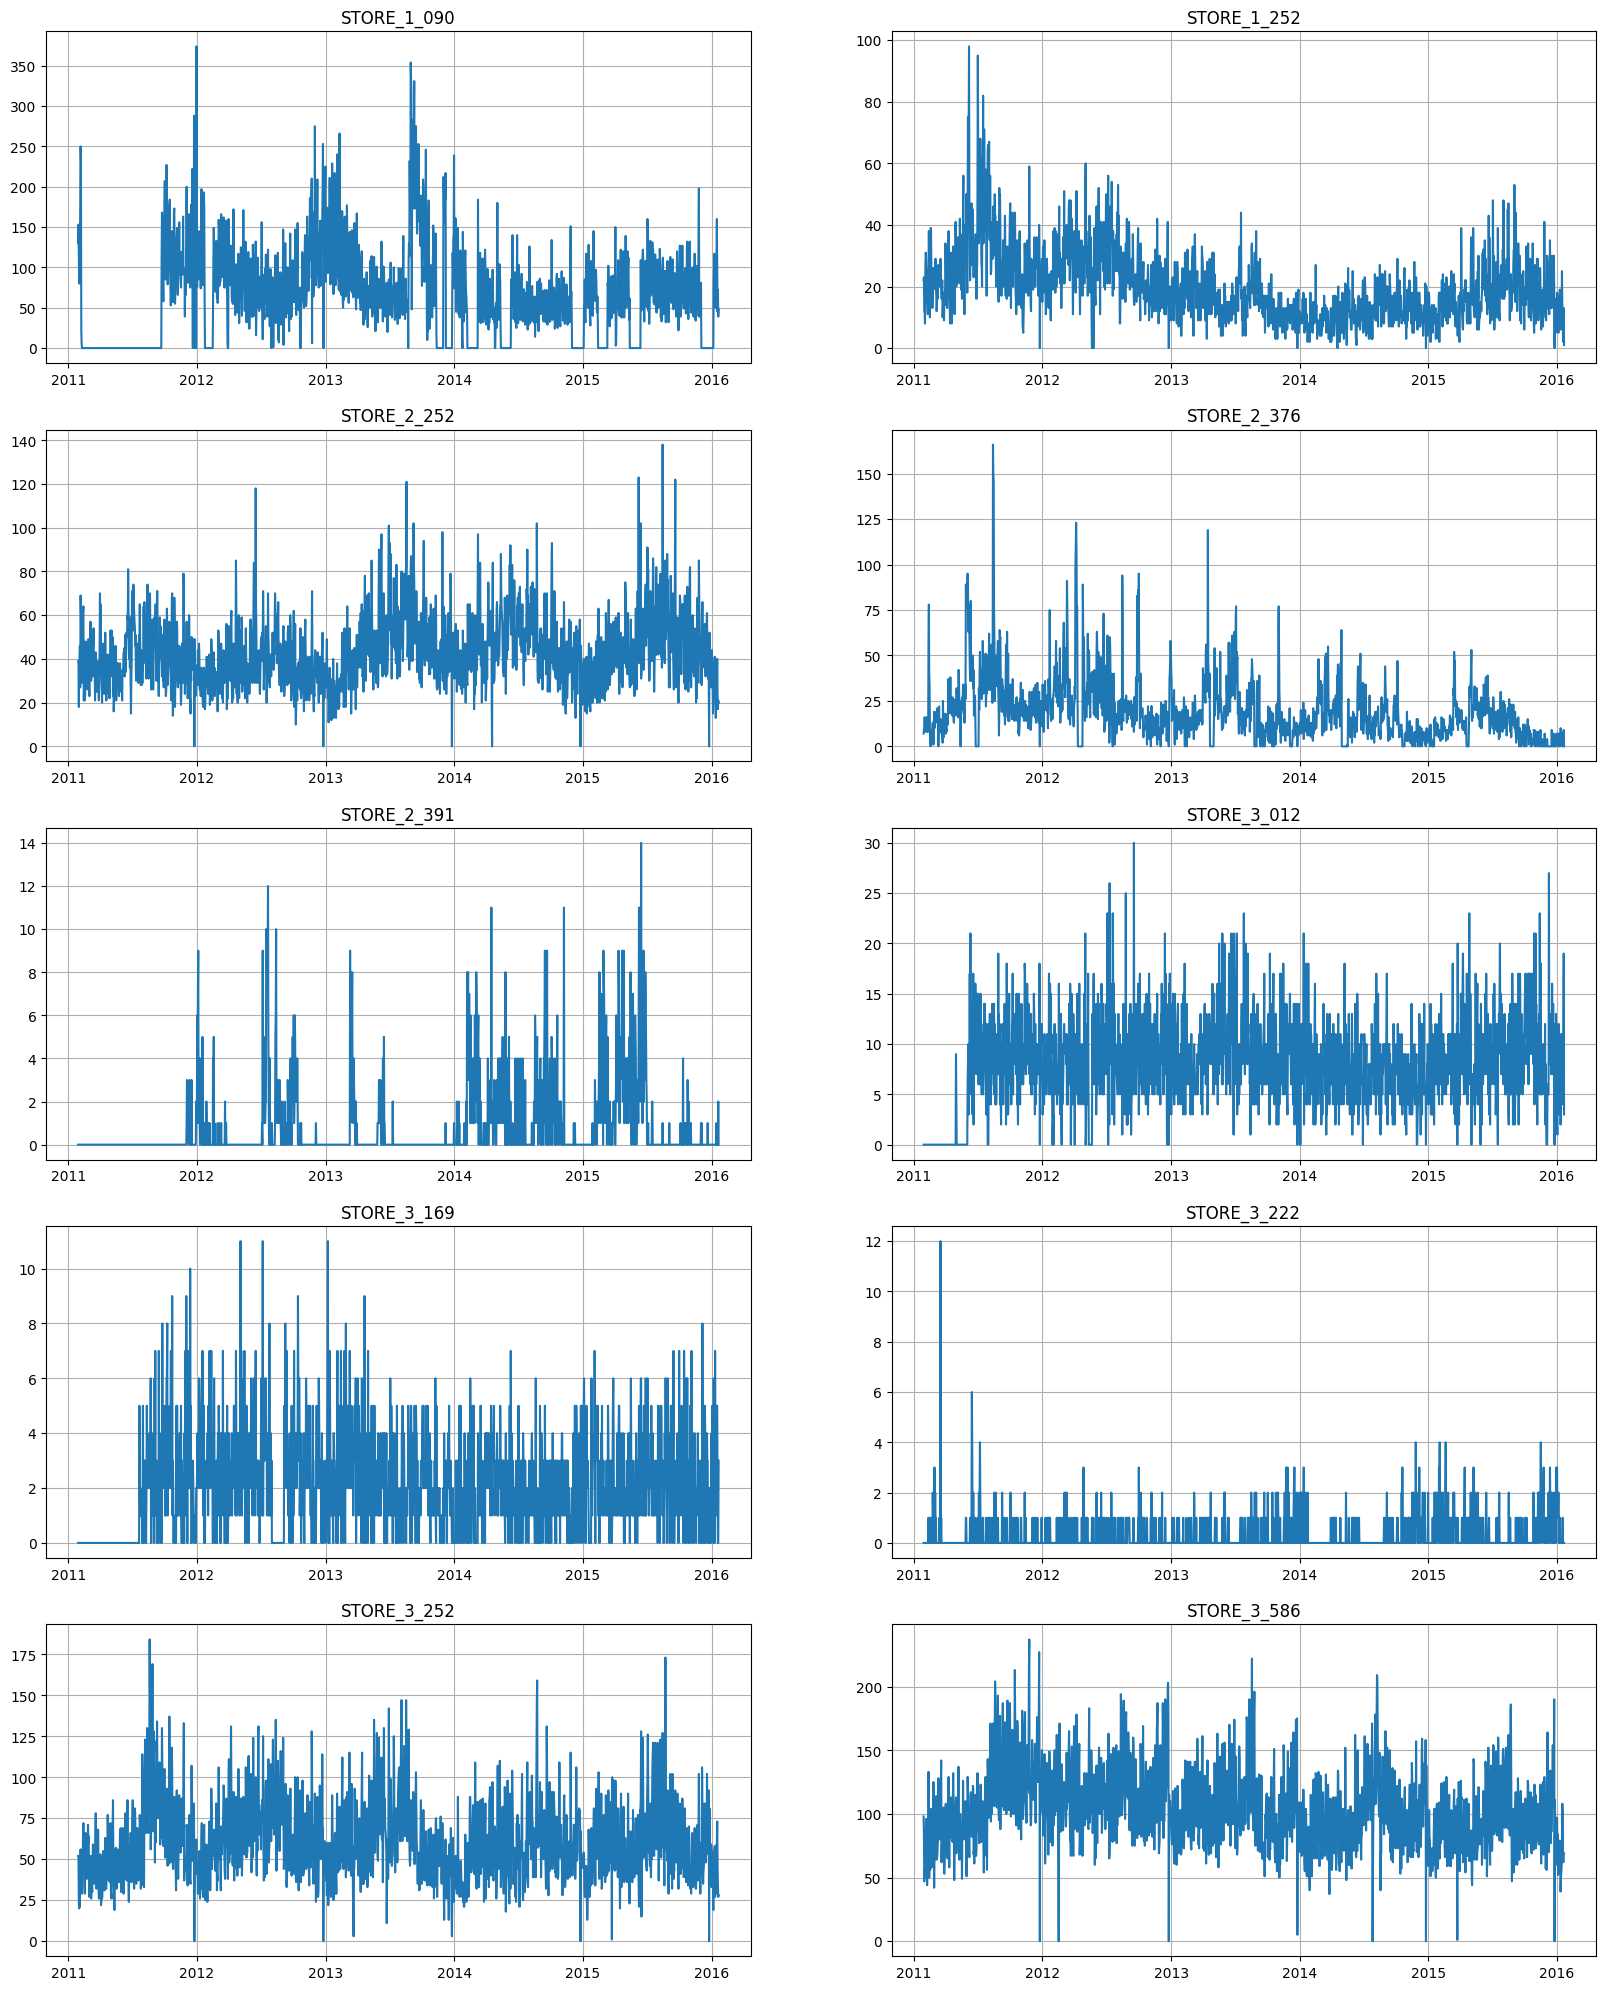

In [19]:
ts.plot()

In [21]:
from etna.analysis import acf_plot
from etna.analysis import cross_corr_plot
from etna.analysis import distribution_plot
from etna.analysis import plot_correlation_matrix

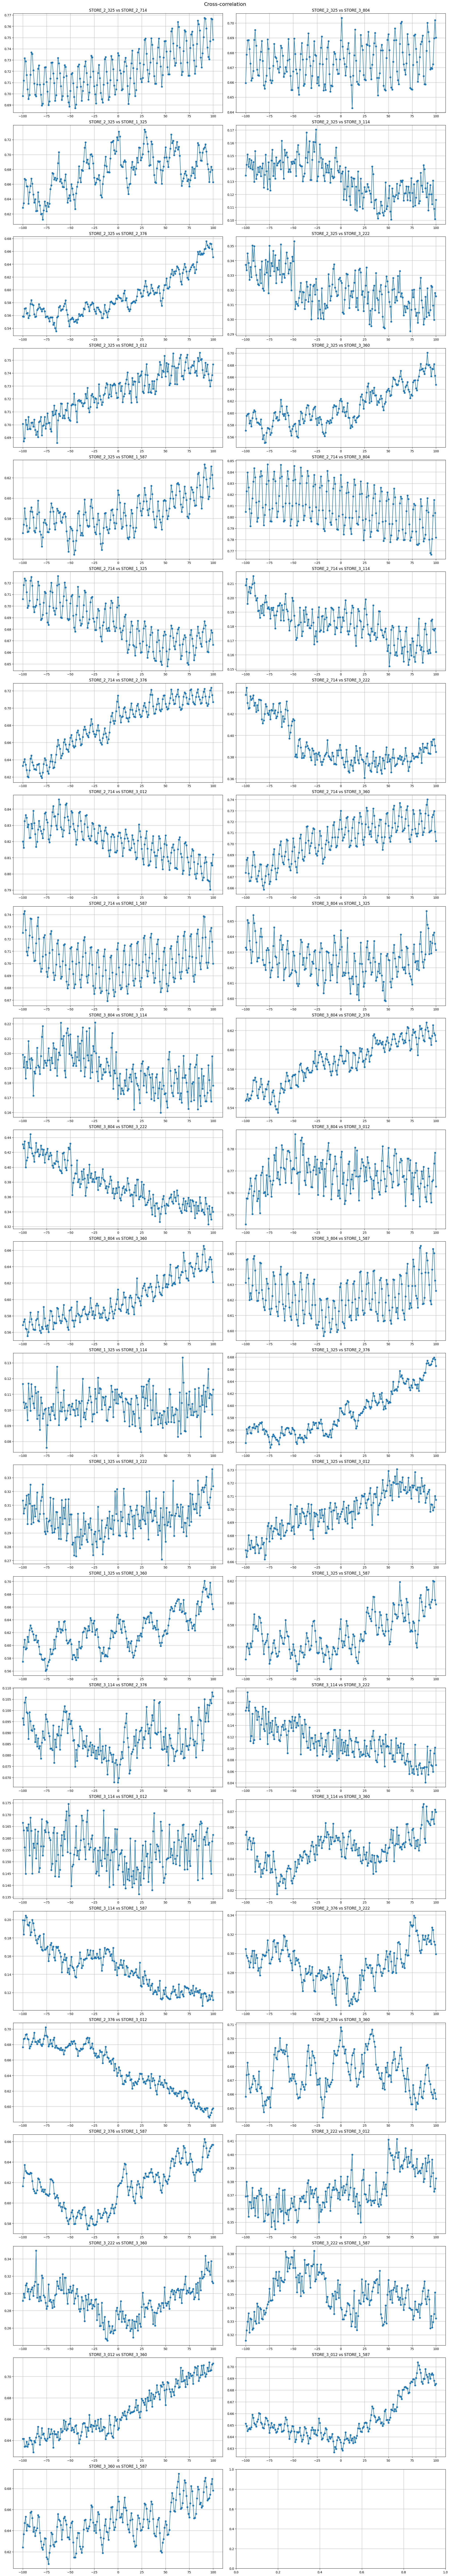

In [24]:
# acf_plot(ts, lags=21, partial=True)
cross_corr_plot(ts, maxlags=100)